In [1]:
#All necessary imports
import numpy as np
import pandas as pd
import string
import nltk
from nltk import tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codezhere/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('data/news.csv', index_col=0)

In [3]:
df.head()

,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
df.shape

(6335, 3)

In [6]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [7]:
df.isna().sum()

title    0
text     0
label    0
dtype: int64

In [8]:
#Removing punctuation
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = "".join(all_list)
    return clean_str

df['text'] = df['text'].apply(punctuation_removal)

#Removing stopwords
df['text'] = df['text'].apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))

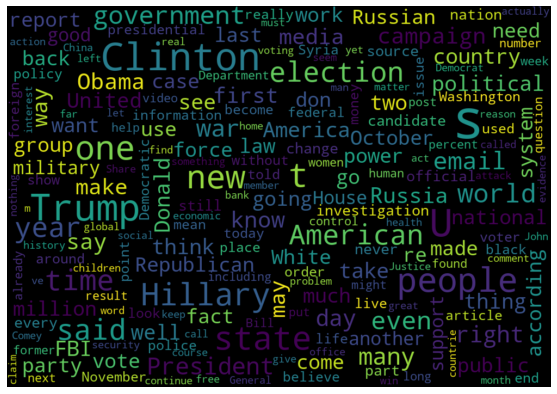

In [9]:
def fake_wordcloud(df):    
    fake_news = df[df['label'] == 'FAKE']
    fake_words = " ".join([text for text in fake_news.text])

    fake_wordcloud = WordCloud(width=1000, height=700,
                              max_font_size=100,
                              collocations=False).generate(fake_words)

    plt.figure(figsize=(10,7))
    plt.imshow(fake_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

fake_wordcloud(df)

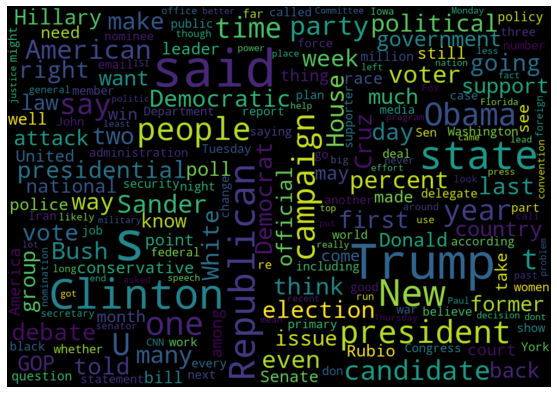

In [10]:
def real_wordcloud(df):
    real_news = df[df['label'] == 'REAL']
    real_words = " ".join([text for text in real_news.text])

    real_wordcloud = WordCloud(width=1000, height=700,
                              max_font_size=100,
                              collocations=False).generate(real_words)

    plt.figure(figsize=(10,7))
    plt.imshow(real_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

real_wordcloud(df)

In [20]:
# Most frequent words counter

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()    

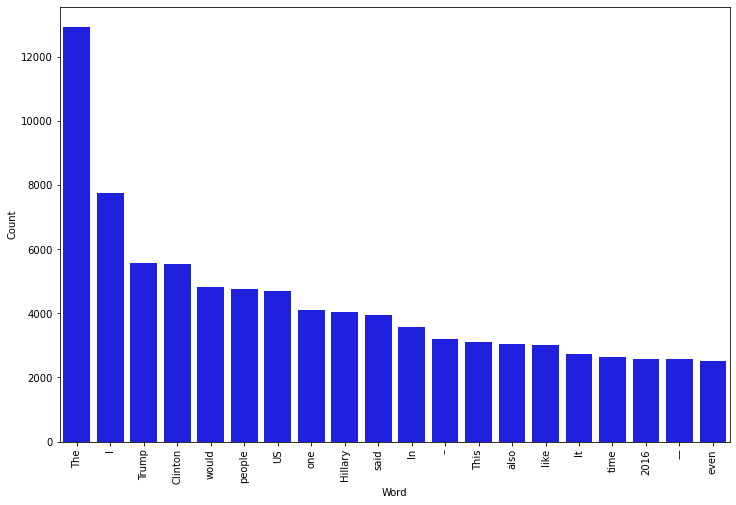

In [21]:
counter(df[df['label'] == "FAKE"], "text", 20)

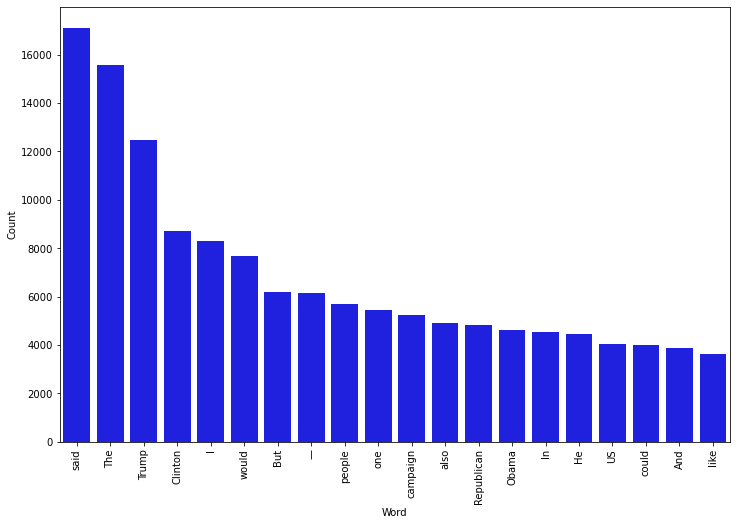

In [13]:
counter(df[df['label'] == "REAL"], "text", 20)